In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import joblib
import scipy.stats as stats
from time import time
%matplotlib inline




import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


data = pd.read_csv('games_details.csv')
data.head(30)

/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


### Clean continuous variables
    1. Fill in missing values
    2. Drop irrelevant/repetitive rows that have null values 


In [2]:
data.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                  102360
FGA                  102360
FG_PCT               102360
FG3M                 102360
FG3A                 102360
FG3_PCT              102360
FTM                  102360
FTA                  102360
FT_PCT               102360
OREB                 102360
DREB                 102360
REB                  102360
AST                  102360
STL                  102360
BLK                  102360
TO                   102360
PF                   102360
PTS                  102360
PLUS_MINUS           126021
dtype: int64

In [3]:

# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = data[ data['FGM'].isnull() ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.head(30)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


#### Drop irrelevant/repetitive variables such as NICKNAME and COMMENT

In [4]:
data.drop(['NICKNAME'], axis=1, inplace=True)
data.drop(['COMMENT'], axis=1, inplace=True)
data.drop(['TEAM_ABBREVIATION'], axis=1, inplace=True)
data.drop(['TEAM_CITY'], axis=1, inplace=True)

### creating files for each task

In [5]:
cleaned_data= data
cleaned_data.to_csv('cleanedGD.csv', index=False)
clean = pd.read_csv('cleanedGD.csv')

tsk1=pd.read_csv('cleanedGD.csv')
tsk2=pd.read_csv('cleanedGD.csv')
tsk3=pd.read_csv('cleanedGD.csv')
tsk4=pd.read_csv('cleanedGD.csv')
tsk5=pd.read_csv('cleanedGD.csv')
tsk1.head(30)

,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,203484,Kentavious Caldwell-Pope,F,27:41,1.0,6.0,0.167,0.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,1628398,Kyle Kuzma,F,30:28,2.0,12.0,0.167,1.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,1629655,Daniel Gafford,C,24:21,9.0,12.0,0.750,0.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,203078,Bradley Beal,G,35:07,9.0,20.0,0.450,5.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,203915,Spencer Dinwiddie,G,28:34,0.0,5.0,0.000,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,203526,Raul Neto,NaN,17:59,1.0,6.0,0.167,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,1626149,Montrezl Harrell,NaN,22:12,6.0,9.0,0.667,0.0,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,1630166,Deni Avdija,NaN,24:59,2.0,9.0,0.222,1.0,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,1630557,Corey Kispert,NaN,11:25,2.0,4.0,0.500,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,1628988,Aaron Holiday,NaN,12:53,1.0,6.0,0.167,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


##### task 1 

In [6]:
tsk1.drop(['GAME_ID'], axis=1, inplace=True)
tsk1.drop(['TEAM_ID'], axis=1, inplace=True)
tsk1.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk1.drop(['MIN'], axis=1, inplace=True)
tsk1.drop(['FGM'], axis=1, inplace=True)
tsk1.drop(['FGA'], axis=1, inplace=True)
tsk1.drop(['FG3M'], axis=1, inplace=True)
tsk1.drop(['FG3A'], axis=1, inplace=True)
tsk1.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk1.drop(['DREB'], axis=1, inplace=True)
tsk1.drop(['OREB'], axis=1, inplace=True)
tsk1.drop(['FTM'], axis=1, inplace=True)
tsk1.drop(['FTA'], axis=1, inplace=True)
tsk1.drop(['TO'], axis=1, inplace=True)
tsk1.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
tsk1.drop(['FG_PCT'], axis=1, inplace=True)
tsk1.drop(['FG3_PCT'], axis=1, inplace=True)
tsk1.drop(['FT_PCT'], axis=1, inplace=True)
tsk1.drop(['PF'], axis=1, inplace=True)
tsk1.drop(['BLK'], axis=1, inplace=True)
tsk1.head()
task_1= tsk1
task_1.to_csv('216359770-215614720-216846396-T1.csv', index=False)
t1 = pd.read_csv('216359770-215614720-216846396-T1.csv')

##### Task 2: Basic Statistical Analysis: From your data set, select one dimension of each kind: Nominal, Ordinal, Interval, Ratio.

In [7]:
tsk2.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk2['START_POSITION'] = tsk2['START_POSITION'].map(START_POSITION_num)
tsk2['START_POSITION'] = tsk2['START_POSITION'].replace(np.nan, 4)
tsk2['PLUS_MINUS'].fillna(tsk2['PLUS_MINUS'].mean(), inplace=True)
tsk2.isnull().sum()
tsk2.drop(['GAME_ID'], axis=1, inplace=True)
tsk2.drop(['TEAM_ID'], axis=1, inplace=True)
# tsk1.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk2.drop(['MIN'], axis=1, inplace=True)
tsk2.drop(['FGM'], axis=1, inplace=True)
tsk2.drop(['FGA'], axis=1, inplace=True)
tsk2.drop(['FG3M'], axis=1, inplace=True)
tsk2.drop(['FG3A'], axis=1, inplace=True)
tsk2.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk2.drop(['DREB'], axis=1, inplace=True)
tsk2.drop(['OREB'], axis=1, inplace=True)
tsk2.drop(['FTM'], axis=1, inplace=True)
tsk2.drop(['FTA'], axis=1, inplace=True)
tsk2.drop(['TO'], axis=1, inplace=True)
tsk2.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
# tsk2.drop(['FG_PCT'], axis=1, inplace=True)
tsk2.drop(['FG3_PCT'], axis=1, inplace=True)
tsk2.drop(['FT_PCT'], axis=1, inplace=True)
tsk2.drop(['PF'], axis=1, inplace=True)
tsk2.drop(['BLK'], axis=1, inplace=True)
tsk2.drop(['REB'], axis=1, inplace=True)
tsk2.drop(['STL'], axis=1, inplace=True)
tsk2.drop(['AST'], axis=1, inplace=True)
task_2= tsk2
task_2.to_csv('216359770-215614720-216846396-T2.csv', index=False)
t2 = pd.read_csv('216359770-215614720-216846396-T2.csv')
t2.head()

,PLAYER_ID,START_POSITION,FG_PCT,PTS
0,203484,1.0,0.167,3.0
1,1628398,1.0,0.167,5.0
2,1629655,2.0,0.750,20.0
3,203078,3.0,0.450,24.0
4,203915,3.0,0.000,0.0


##### Task 3: Standardization and Normalization: Select two dimensions, one Interval and one Ratio; dimensions from Task2 may be reused.

In [8]:
tsk3.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk3['START_POSITION'] = tsk3['START_POSITION'].map(START_POSITION_num)
tsk3['START_POSITION'] = tsk3['START_POSITION'].replace(np.nan, 4)
tsk3['PLUS_MINUS'].fillna(tsk3['PLUS_MINUS'].mean(), inplace=True)
tsk3.isnull().sum()
tsk3.drop(['GAME_ID'], axis=1, inplace=True)
tsk3.drop(['TEAM_ID'], axis=1, inplace=True)
tsk3.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk3.drop(['MIN'], axis=1, inplace=True)
tsk3.drop(['FGM'], axis=1, inplace=True)
tsk3.drop(['FGA'], axis=1, inplace=True)
tsk3.drop(['FG3M'], axis=1, inplace=True)
tsk3.drop(['FG3A'], axis=1, inplace=True)
tsk3.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk3.drop(['DREB'], axis=1, inplace=True)
tsk3.drop(['OREB'], axis=1, inplace=True)
tsk3.drop(['FTM'], axis=1, inplace=True)
tsk3.drop(['FTA'], axis=1, inplace=True)
tsk3.drop(['TO'], axis=1, inplace=True)
tsk3.drop(['PLAYER_NAME'], axis=1, inplace=True)
tsk3.drop(['START_POSITION'], axis=1, inplace=True)
# tsk2.drop(['FG_PCT'], axis=1, inplace=True)
tsk3.drop(['FG3_PCT'], axis=1, inplace=True)
tsk3.drop(['FT_PCT'], axis=1, inplace=True)
tsk3.drop(['PF'], axis=1, inplace=True)
tsk3.drop(['BLK'], axis=1, inplace=True)
tsk3.drop(['REB'], axis=1, inplace=True)
tsk3.drop(['STL'], axis=1, inplace=True)
tsk3.drop(['AST'], axis=1, inplace=True)
task_3= tsk3
task_3.to_csv('216359770-215614720-216846396-T3.csv', index=False)
t3 = pd.read_csv('216359770-215614720-216846396-T3.csv')
t3.head()

,FG_PCT,PTS
0,0.167,3.0
1,0.167,5.0
2,0.750,20.0
3,0.450,24.0
4,0.000,0.0


#####  Task 4 Principal Component Analysis preprocessing: convert name attributes into numerical and remove rest NaN and delete extra dimensions


In [9]:
tsk4.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk4['START_POSITION'] = tsk4['START_POSITION'].map(START_POSITION_num)
tsk4['START_POSITION'] = tsk4['START_POSITION'].replace(np.nan, 4)
tsk4['PLUS_MINUS'].fillna(tsk4['PLUS_MINUS'].mean(), inplace=True)
tsk4.isnull().sum()
tsk4.drop(['GAME_ID'], axis=1, inplace=True)
tsk4.drop(['TEAM_ID'], axis=1, inplace=True)
tsk4.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk4.drop(['MIN'], axis=1, inplace=True)
tsk4.drop(['FGM'], axis=1, inplace=True)
tsk4.drop(['FGA'], axis=1, inplace=True)
tsk4.drop(['FG3M'], axis=1, inplace=True)
tsk4.drop(['FG3A'], axis=1, inplace=True)
tsk4.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk4.drop(['DREB'], axis=1, inplace=True)
tsk4.drop(['OREB'], axis=1, inplace=True)
tsk4.drop(['FTM'], axis=1, inplace=True)
tsk4.drop(['FTA'], axis=1, inplace=True)
tsk4.drop(['TO'], axis=1, inplace=True)
tsk4.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
# t1.drop(['FG_PCT'], axis=1, inplace=True)
# t1.drop(['FG3_PCT'], axis=1, inplace=True)
# t1.drop(['FT_PCT'], axis=1, inplace=True)
# t1.drop(['PF'], axis=1, inplace=True)


task_4= tsk4
task_4.to_csv('216359770-215614720-216846396-T4.csv', index=False)
t4 = pd.read_csv('216359770-215614720-216846396-T4.csv')
t4.head()

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.0,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.0,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.4,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.0,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.0,3.0,2.0,0.0,0.0,1.0,0.0


##### Task 5 Similarity Measurement select any 5 numeric dimensions and leave the additional.
##### Submit your filtered data, the data for the selected dimensions.


In [10]:
tsk5.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk5['START_POSITION'] = tsk5['START_POSITION'].map(START_POSITION_num)
tsk5['START_POSITION'] = tsk5['START_POSITION'].replace(np.nan, 4)
tsk5['PLUS_MINUS'].fillna(tsk5['PLUS_MINUS'].mean(), inplace=True)
tsk4.isnull().sum()
tsk5.drop(['GAME_ID'], axis=1, inplace=True)
tsk5.drop(['TEAM_ID'], axis=1, inplace=True)
tsk5.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk5.drop(['MIN'], axis=1, inplace=True)
tsk5.drop(['FGM'], axis=1, inplace=True)
tsk5.drop(['FGA'], axis=1, inplace=True)
tsk5.drop(['FG3M'], axis=1, inplace=True)
tsk5.drop(['FG3A'], axis=1, inplace=True)
tsk5.drop(['BLK'], axis=1, inplace=True)

tsk5.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk5.drop(['DREB'], axis=1, inplace=True)
tsk5.drop(['OREB'], axis=1, inplace=True)
tsk5.drop(['FTM'], axis=1, inplace=True)
tsk5.drop(['FTA'], axis=1, inplace=True)
tsk5.drop(['TO'], axis=1, inplace=True)
tsk5.drop(['PLAYER_NAME'], axis=1, inplace=True)
# data.drop(['START_POSITION'], axis=1, inplace=True)
tsk5.drop(['FG_PCT'], axis=1, inplace=True)
tsk5.drop(['FG3_PCT'], axis=1, inplace=True)
tsk5.drop(['FT_PCT'], axis=1, inplace=True)
tsk5.drop(['PF'], axis=1, inplace=True)
tsk5.head()
task_5= tsk5
task_5.to_csv('216359770-215614720-216846396-T5.csv', index=False)
t5 = pd.read_csv('216359770-215614720-216846396-T5.csv')

## Task 1 Describing the Data

In [11]:
t1.head()

,START_POSITION,REB,AST,STL,PTS
0,F,6.0,2.0,1.0,3.0
1,F,5.0,3.0,1.0,5.0
2,C,9.0,1.0,2.0,20.0
3,G,3.0,7.0,2.0,24.0
4,G,3.0,2.0,0.0,0.0


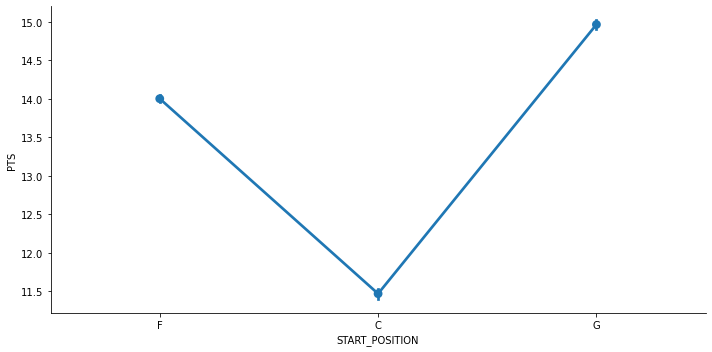

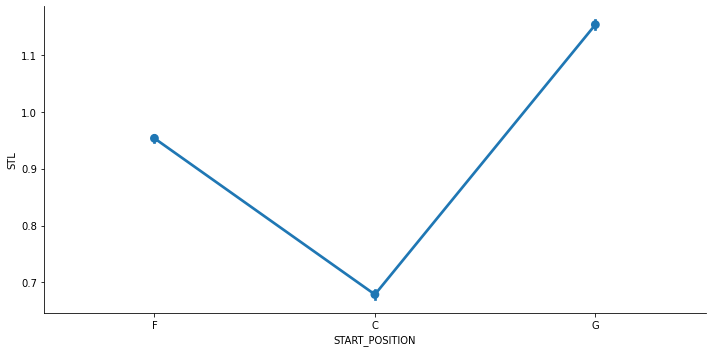

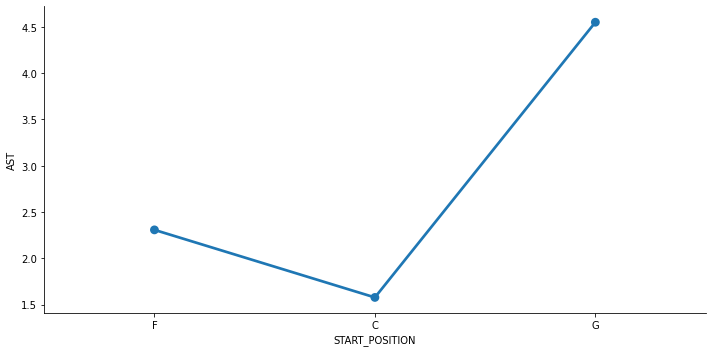

<Figure size 432x288 with 0 Axes>

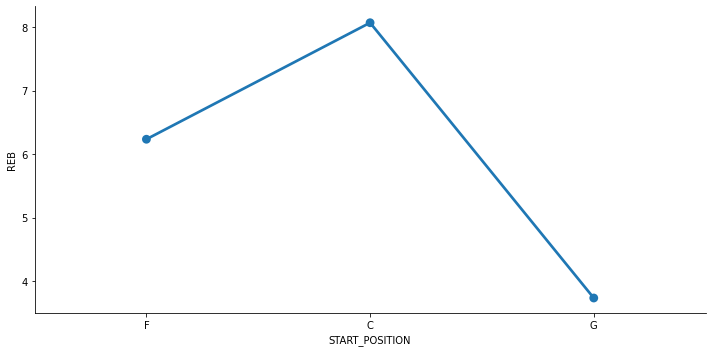

In [12]:
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='PTS', data=t1, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='STL', data=data, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='AST', data=data, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='REB', data=data, kind='point', aspect=2, )


# analysis needed for task 1 ^

## Task 4 Principal Component Analysis

# PCA Analysis

In [13]:
t4.head()

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.0,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.0,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.4,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.0,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.0,3.0,2.0,0.0,0.0,1.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler
scalar_data=t4
scaler = StandardScaler()
scaler.fit(scalar_data)
scaled_data = scaler.transform(scalar_data)
from sklearn.decomposition import PCA
# scalar_data

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(523751, 10)

In [16]:
x_pca.shape

(523751, 2)

Text(0, 0.5, 'Second Principal Component')

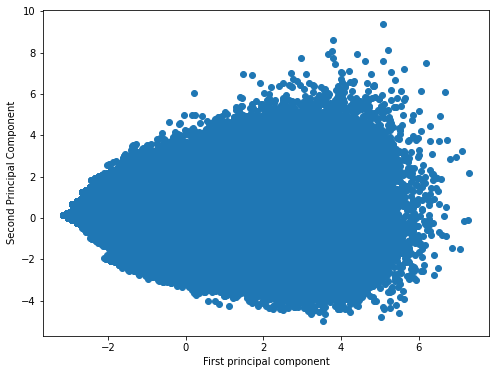

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [18]:
df_comp = pd.DataFrame(pca.components_,columns=scalar_data.columns)

<AxesSubplot:>

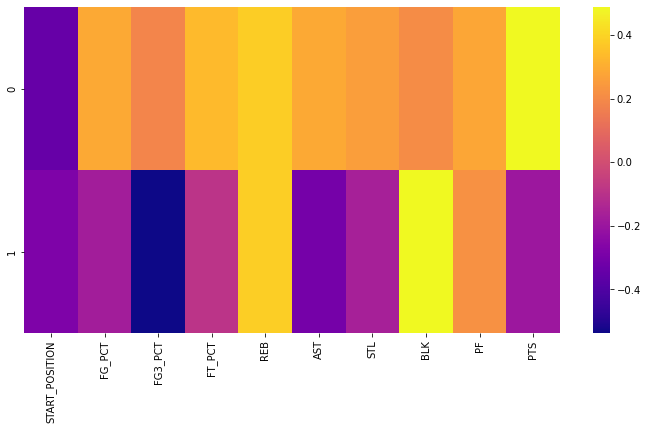

In [19]:
plt.figure(figsize=(12,6))
sb.heatmap(df_comp,cmap='plasma',)

### Task 5: Similarity Measurement
#### From your data set select the object type with most numeric dimensions. For this task we will use only numeric dimensions of that object type; so, ignore the other dimensions. If the number of numeric dimensions is more than 5 in this object type, then you many select any 5 numeric dimensions and leave the additional
##### dropping all non numeric entities, and additional numberic entities

##### Submit your filtered data, the data for the selected dimensions, in the form of a CSV file: name it as 100131001-100131002—T5Data.csv

## Hierarchial clustering